In [1]:
import pandas as pd
df1 = pd.read_csv('HeightWeight.csv')
print("number of data points in our popultion:", df1.shape)
df1.head(2)

number of data points in our popultion: (25000, 3)


,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873


In [14]:
df=df1['Height(Inches)']
df.head(2)

0    65.78331
1    71.51521
Name: Height(Inches), dtype: float64

Number of samples in our data:  25000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


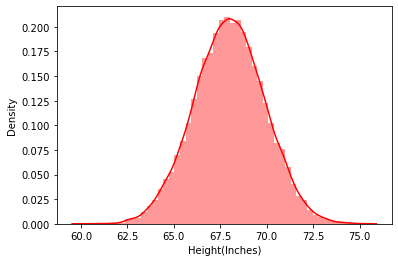

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


print("Number of samples in our data: ",df.shape[0])
sns.distplot(df, color='r',kde=True)
plt.show()
# population mean
pop_mean = np.round(df.mean(),3)
# population std
pop_std = np.round(df.std(),3)

In [16]:
print("population mean is",pop_mean)
print("population std deviation",pop_std)

population mean is 67.993
population std deviation 1.902


 # Confidence interval when we  have knowldge about population standard deviation

In [22]:
#so we take sigma=pop_std


 there is $95\%$ probability that pop mean will be within the range [ <font color='red'>$\mu-2\sigma$</font>, <font color='red'>$\mu+2\sigma$</font>] __

In [29]:
#lets take a sample
import random


In [85]:
def calculate_ci(sample_mean,sigma):
    ci2=sample_mean+2*(sigma/np.sqrt(1000))
    ci1=sample_mean-2*(sigma/np.sqrt(1000))
    print("confidence interval range is ",ci1,ci2)
    return ci1,ci2

In [86]:
def take_sample():
      sample=np.random.choice(df, size=1000)
      sample_mean=np.mean(sample)
      sample_std=np.std(sample)

      return sample_mean, sample_std




In [87]:
def check_pop_mean__in_ci(ci1,ci2):
  if pop_mean > ci1 and pop_mean < ci2:
    print("yes it lies")
  else:
    print("no it doesnt lies")

In [88]:
for i in range(0,10):
    print("pop_mean",pop_mean)
    sigma=pop_std
    sample_mean,sample_std=take_sample()
    ci1,ci2=calculate_ci(sample_mean,sigma)
    check_pop_mean__in_ci(ci1,ci2)



pop_mean 67.993
confidence interval range is  67.83750688780721 68.0780929721928
yes it lies
pop_mean 67.993
confidence interval range is  67.8439293878072 68.08451547219279
yes it lies
pop_mean 67.993
confidence interval range is  67.89329344780718 68.13387953219278
yes it lies
pop_mean 67.993
confidence interval range is  67.8671373578072 68.10772344219279
yes it lies
pop_mean 67.993
confidence interval range is  67.88976607780721 68.1303521621928
yes it lies
pop_mean 67.993
confidence interval range is  67.9807610378072 68.2213471221928
yes it lies
pop_mean 67.993
confidence interval range is  67.8167466878072 68.0573327721928
yes it lies
pop_mean 67.993
confidence interval range is  67.9984915078072 68.2390775921928
no it doesnt lies
pop_mean 67.993
confidence interval range is  67.79153432780718 68.03212041219278
yes it lies
pop_mean 67.993
confidence interval range is  67.82516086780721 68.06574695219281
yes it lies


 # Confidence interval when we dont have knowldge about population standard deviation

In [72]:
#we use sigma as sample standard_deviation

In [78]:
for i in range(0,10):

    sample_mean,sample_std=take_sample()
    sigma1=sample_std
    ci1,ci2=calculate_ci(sample_mean,sigma1)
    check_pop_mean__in_ci(ci1,ci2)


confidence interval range is  67.54344004362555 68.32060655637444
yes it lies
confidence interval range is  67.75007363963233 68.49147836036768
yes it lies
confidence interval range is  67.835661320921 68.695740879079
yes it lies
confidence interval range is  67.61667028384187 68.44202071615811
yes it lies
confidence interval range is  67.46995118303803 68.28587061696197
yes it lies
confidence interval range is  67.44743539738899 68.255711402611
yes it lies
confidence interval range is  67.63087597319718 68.35131602680285
yes it lies
confidence interval range is  67.38655213119907 68.19357766880094
yes it lies
confidence interval range is  67.6797676756983 68.5058015243017
yes it lies
confidence interval range is  67.16645522959406 67.9651245704059
no it doesnt lies


#CONFIDENCE INTERVAL USING BOOTSTRAPPING

In [2]:
df=df1['Height(Inches)']
df.head(2)

0    65.78331
1    71.51521
Name: Height(Inches), dtype: float64

In [6]:
print("population median",np.median(df))

population median 67.9957


In [17]:
import random
s=random.sample(df.values.tolist(),1000)
print(len(s))

1000


In [18]:
#boostrap samples and their medians
medians=[]
for i in range(0,1000):
  random_samples_with_replacment=np.random.choice(s,100)
  medians.append(np.median(random_samples_with_replacment))

print(len(medians))
print(medians)

1000
[68.56877, 68.160515, 68.19172499999999, 68.524225, 67.94404499999999, 68.42660000000001, 68.17143, 68.2033, 67.88169500000001, 68.214965, 68.06524999999999, 68.38498, 68.36325, 68.048685, 68.31537, 68.159975, 68.09493499999999, 68.042385, 68.336495, 67.8216, 67.95539, 68.08459500000001, 68.272045, 68.28614, 68.082315, 68.243325, 68.276905, 67.92882, 68.53047, 68.39793499999999, 68.123665, 68.1894, 68.24988, 68.193015, 68.34943000000001, 68.337305, 68.432065, 68.36866, 68.16265, 67.7098, 68.00856999999999, 68.54577499999999, 67.89729, 68.22334000000001, 68.10582, 68.33155, 68.38974, 68.03389999999999, 68.106655, 67.96129, 67.76833500000001, 68.11209500000001, 67.81987000000001, 68.05295000000001, 68.30906999999999, 68.18387, 68.225415, 68.301365, 68.14699999999999, 68.22868, 68.26931, 67.99942999999999, 68.353005, 68.39183499999999, 68.52725000000001, 67.99660499999999, 68.67492, 68.159975, 68.37714500000001, 68.07496499999999, 68.07540499999999, 67.74894, 67.95635, 68.45576, 68.4

In [19]:
ci1= np.percentile(medians,2.5)
ci2= np.percentile(medians,97.5)


In [20]:
print(ci1,ci2)

67.59516212500002 68.56878725


In [21]:
np.median(df)

67.9957

In [22]:
#90 % confidence
ci1= np.percentile(medians,5)
ci2= np.percentile(medians,95)

In [23]:
ci1

67.7022685

In [24]:
ci2

68.524304

#one mean test
the IQ in a certain population is normally distributed with a mean of μ = 100 and standard deviation of σ = 15. A researcher wants to know if a new drug affects IQ levels, so he recruits 20 patients to try it and records their IQ levels

In [12]:
alpha =0.05

from statsmodels.stats.weightstats import ztest as ztest

#enter IQ levels for 20 patients
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99,
        105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

#perform one sample z-test
ztest_Score, p_value=ztest(data, value=100)

print(ztest_Score, p_value)
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")



1.5976240527147705 0.1101266701438426
Fail to Reject NUll Hypothesis


#2 mean test

Suppose the IQ levels among individuals in two different cities are known to be normally distributed with known standard deviations.

A researcher wants to know if the mean IQ level between individuals in city A and city B are different, so she selects a simple random sample of  20 individuals from each city and records their IQ levels

In [5]:
from statsmodels.stats.weightstats import ztest as ztest

#enter IQ levels for 20 individuals from each city
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
         109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

#perform two sample z-test
ztest(cityA, cityB, value=0) 

(-1.9953236073282115, 0.046007596761332065)

(-1.9953236073282115, 0.046007596761332065)

The test statistic for the two sample z-test is -1.9953 and the corresponding p-value is 0.0460.

Since this p-value is less than .05, we have sufficient evidence to reject the null hypothesis. In other words, the mean IQ level is significantly different between the two cities.

In [4]:

# Importing library
from statsmodels.stats.weightstats import ttest_ind
import numpy as np
 
# Creating data groups
data_group1 = np.array([160, 150, 160, 156.12,
                        163.24,
                        160.56, 168.56, 174.12,
                        167.123, 165.12])
data_group2 = np.array([157.97, 146, 140.2, 170.15,
                        167.34, 176.123, 162.35,
                        159.123, 169.43, 148.123])
 
# Conducting two-sample ttest
ttest_ind(data_group1, data_group2)

(0.6531479162158739, 0.5219170107019715, 18.0)

In [3]:
from statsmodels.stats.proportion import proportions_ztest

# can we assume anything from our sample
significance = 0.05

# our sample - 82% are good
sample_success = 410
sample_size = 500

# our Ho is  80%
null_hypothesis = 0.80

# check our sample against Ho for Ha > Ho
# for Ha < Ho use alternative='smaller'
# for Ha != Ho use alternative='two-sided'
stat, p_value = proportions_ztest (count=sample_success, nobs=sample_size, value=null_hypothesis, alternative='larger')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value)) 

if p_value > significance:
   print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

z_stat: 1.164, p_value: 0.122
Fail to reject the null hypothesis - we have nothing else to say


In [6]:

from statsmodels.stats.proportion import -
\
import numpy as np

# can we assume anything from our sample
significance = 0.025

# our samples - 82% are good in one, and ~79% are good in the other
# note - the samples do not need to be the same size
sample_success_a, sample_size_a = (5,83) 
sample_success_b, sample_size_b = (12,99)

# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

if p_value > significance:
   print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

z_stat: -1.408, p_value: 0.159
Fail to reject the null hypothesis - we have nothing else to say


In [11]:
import numpy as np
from mlxtend.evaluate import permutation_test

x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([2, 4, 1, 5, 6, 7])


p_value = permutation_test(x, y,method='exact',seed=0)
print('P value: %.2f' % p_value)

P value: 0.49


In [12]:
import numpy as np
from mlxtend.evaluate import permutation_test

x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([2, 4, 1, 5, 6, 7])


p_value = permutation_test(x, y,
                           func="x_mean > y_mean",
                           method='exact',
                           seed=0)
print('P value: %.2f' % p_value)

P value: 0.66


In [16]:
import numpy as np
from mlxtend.evaluate import permutation_test

x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([2, 4, 1, 5, 6, 7])
p_value = permutation_test(x, y,
                           method='exact',
                           func=lambda x, y: -,
                           seed=0)
print('P value: %.2f' % p_value)





P value: 0.09
